# Data Cleaning Project

### Data Cleaning  6 Steps

#### 1 Handling Missing Data
#### 2 Handling Duplicates
#### 3 Dealing with Inconsistent Data types
#### 4 Encoding Categorical Values    
#### 5 Outlier Detection and Handling 
#### 6 Data Transformation and Scaling

In [1]:
# import librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

data=pd.read_csv('https://github.com/chandanverma07/DataSets/blob/master/Car%20details%20v3.csv?raw=true')
data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [3]:
# Checking overall information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
# removing unncessary columns

data=data.drop(['torque','seller_type'],axis=1)
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [5]:
# checking total null values column wise

print(data.shape)
print()
print(data.isnull().sum())
# print(data.isnull().sum()*100/data.shape[0])


(8128, 11)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64


In [6]:
# removing null rows

data.dropna(inplace=True)
print(data.shape)
data.isnull().sum()

(7907, 11)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [7]:
# adding functions

# extracting car_company_name
def company_name_extract(x):
    return x[:x.index(" ")]

# extracting car_model
def car_model_extract(x):
    try:
        return x[x.index(" ")+1 :]
    except:
        return x
    

# Prices Converter
def rupe_change(x):
    p = x.split(" ")
    try:
        if p[1]=='Lakh':
            return str(float(p[0]) * 100000)
        elif p[1]=='Crore':
            return str(float(p[0]) * 10000000)
    except:
        return x


In [8]:
# Car Names and Company

# data['company_name'] = data['name'].str.split(" ").str[0]
data['company_name'] = data['name'].apply(company_name_extract)

data['car_model_name'] = data['name'].apply(car_model_extract)

data.head(2)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,company_name,car_model_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda,Rapid 1.5 TDI Ambition


In [9]:
# Max Power          [Strip, Replace,Split]

data.rename(columns={'max_power':'max_power_in_bhp'},inplace = True)

data['max_power_in_bhp'] = data['max_power_in_bhp'].str.strip().str.split(' ').str[0]

# checking any data conatins 'bhp'
data[data['max_power_in_bhp']=='bhp']
data['max_power_in_bhp'] = data['max_power_in_bhp'].str.replace('bhp','0')

data.head(2)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power_in_bhp,seats,company_name,car_model_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition


In [10]:
# Mileage and Engine

data.rename(columns={'mileage':'mileage_in_kmpl','engine':'engine_in_CC'}, inplace = True)

data['mileage_in_kmpl'] = data['mileage_in_kmpl'].str.strip().str.split(' ').str[0]
data['engine_in_CC']    = data['engine_in_CC'].str.strip().str.split(' ').str[0]
data.head(2)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage_in_kmpl,engine_in_CC,max_power_in_bhp,seats,company_name,car_model_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4,1248,74,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition


In [11]:
# Dropping Redundant Column

data.drop(['name'],axis=1, inplace = True)
data.head(2)

,year,selling_price,km_driven,fuel,transmission,owner,mileage_in_kmpl,engine_in_CC,max_power_in_bhp,seats,company_name,car_model_name
0,2014,450000,145500,Diesel,Manual,First Owner,23.4,1248,74,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              7907 non-null   int64  
 1   selling_price     7907 non-null   int64  
 2   km_driven         7907 non-null   int64  
 3   fuel              7907 non-null   object 
 4   transmission      7907 non-null   object 
 5   owner             7907 non-null   object 
 6   mileage_in_kmpl   7907 non-null   object 
 7   engine_in_CC      7907 non-null   object 
 8   max_power_in_bhp  7907 non-null   object 
 9   seats             7907 non-null   float64
 10  company_name      7907 non-null   object 
 11  car_model_name    7907 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


In [13]:
# Changing Data Types

data['mileage_in_kmpl'] = data['mileage_in_kmpl'].astype('float64')
data['engine_in_CC']    = data['engine_in_CC'].astype('float64')
data['max_power_in_bhp']= data['max_power_in_bhp'].astype('float64')

# data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              7907 non-null   int64  
 1   selling_price     7907 non-null   int64  
 2   km_driven         7907 non-null   int64  
 3   fuel              7907 non-null   object 
 4   transmission      7907 non-null   object 
 5   owner             7907 non-null   object 
 6   mileage_in_kmpl   7907 non-null   float64
 7   engine_in_CC      7907 non-null   float64
 8   max_power_in_bhp  7907 non-null   float64
 9   seats             7907 non-null   float64
 10  company_name      7907 non-null   object 
 11  car_model_name    7907 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 803.1+ KB


# Encoding
### LabelEncoder      for Encoding
### StandardScaler    for Scaling

In [14]:
# importing Libraries

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [15]:
# Now Storing the Original Data and making a Copy of it for further use

data1=data
data1.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage_in_kmpl,engine_in_CC,max_power_in_bhp,seats,company_name,car_model_name
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII


In [16]:
car_company_name_en    = LabelEncoder().fit_transform(data1['company_name'])
print(car_company_name_en)

car_model_name_en      = LabelEncoder().fit_transform(data1['car_model_name'])
print(car_model_name_en)

owner_en      = LabelEncoder().fit_transform(data1['owner'])
print(owner_en)

[20 26 10 ... 20 27 27]
[1492 1236  325 ... 1504  865  865]
[0 2 4 ... 0 0 0]


In [17]:
# Encoding Car,Company Names and Owner

car_company_name_en    = LabelEncoder().fit_transform(data1['company_name'])
data1['company_name']   = LabelEncoder().fit_transform(data1['company_name'])

car_model_name_en      = LabelEncoder().fit_transform(data1['car_model_name'])
data1['car_model_name'] = car_model_name_en

owner_en      = LabelEncoder().fit_transform(data1['owner'])
data1['owner'] = owner_en


data1.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage_in_kmpl,engine_in_CC,max_power_in_bhp,seats,company_name,car_model_name
0,2014,450000,145500,Diesel,Manual,0,23.40,1248.0,74.00,5.0,20,1492
1,2014,370000,120000,Diesel,Manual,2,21.14,1498.0,103.52,5.0,26,1236
2,2006,158000,140000,Petrol,Manual,4,17.70,1497.0,78.00,5.0,10,325
3,2010,225000,127000,Diesel,Manual,0,23.00,1396.0,90.00,5.0,11,1980
4,2007,130000,120000,Petrol,Manual,0,16.10,1298.0,88.20,5.0,20,1533


In [18]:
le = LabelEncoder()

fuel_en = le.fit_transform(data1['fuel'])
data1['fuel'] = fuel_en

transmission_en = le.fit_transform(data1['transmission'])
data1['transmission'] = transmission_en

data1.head(3)

,year,selling_price,km_driven,fuel,transmission,owner,mileage_in_kmpl,engine_in_CC,max_power_in_bhp,seats,company_name,car_model_name
0,2014,450000,145500,1,1,0,23.40,1248.0,74.00,5.0,20,1492
1,2014,370000,120000,1,1,2,21.14,1498.0,103.52,5.0,26,1236
2,2006,158000,140000,3,1,4,17.70,1497.0,78.00,5.0,10,325


In [19]:
# To know the length of unique valeus

l1 = list(data1['owner'].unique())           # change the column name
len(l1)

5

## Outliers

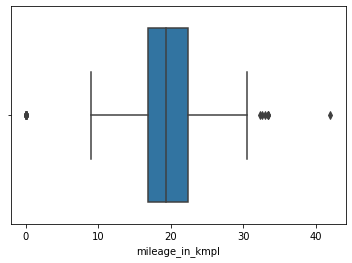

In [20]:
# To Check Outliers


# Example taken of 'mileage_in_kmpl'
sns.boxplot(data=data1,x='mileage_in_kmpl')
plt.show()

In [21]:
# Removing Outliers using quantile method


# Example taken of 'mileage_in_kmpl'
q1= np.quantile(a=data1['mileage_in_kmpl'],q=0.25)
print('q1 is : ',q1)
q3= np.quantile(a=data1['mileage_in_kmpl'],q=0.75)
print('q3 is : ',q3
     )
iqr = q3-q1              # inter quantile range
print('iqr is : ',iqr)


print("------------------------------------")
min_r = q1 - (1.5*iqr)
max_r = q3 +  (1.5*iqr)
print('min_r is : ',min_r)
print('max_r is : ',max_r)

q1 is :  16.78
q3 is :  22.32
iqr is :  5.539999999999999
------------------------------------
min_r is :  8.470000000000002
max_r is :  30.63


In [22]:
# Now Removing the outliers based on max quantile, hence some data will get removed

print('Before Data : ',data1.shape)
data1 = data1[data1['mileage_in_kmpl']<= max_r]
print('After Data  : ',data1.shape)

Before Data :  (7907, 12)
After Data  :  (7900, 12)


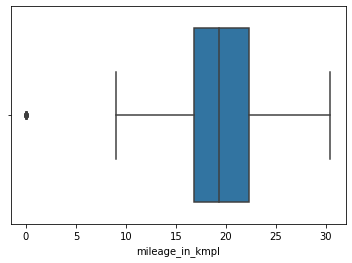

In [23]:
# outliers are removed from the max quantile

sns.boxplot(data=data1,x='mileage_in_kmpl')
plt.show()

# Scaling

In [24]:
ss = StandardScaler()

In [28]:
pd.DataFrame(ss.fit_transform(data1), columns=data1.columns)

,year,selling_price,km_driven,fuel,transmission,owner,mileage_in_kmpl,engine_in_CC,max_power_in_bhp,seats,company_name,car_model_name
0,0.005468,-0.246348,1.342980,-0.888844,0.389363,-0.655342,0.995322,-0.418841,-0.493779,-0.435459,0.318649,0.760542
1,0.005468,-0.345482,0.894003,-0.888844,0.389363,1.003220,0.432177,0.077387,0.335825,-0.435459,1.167234,0.341762
2,-2.063868,-0.608187,1.246142,1.109979,0.389363,2.661782,-0.424999,0.075402,-0.381366,-0.435459,-1.095659,-1.148505
3,-1.029200,-0.525162,1.017252,-0.888844,0.389363,-0.655342,0.895650,-0.125074,-0.044129,-0.435459,-0.954228,1.558841
4,-1.805201,-0.642884,0.894003,1.109979,0.389363,-0.655342,-0.823686,-0.319596,-0.094714,-0.435459,0.318649,0.827612
...,...,...,...,...,...,...,...,...,...,...,...,...
7895,-0.253199,-0.407440,0.717934,1.109979,0.389363,-0.655342,-0.225656,-0.520072,-0.245066,-0.435459,-0.954228,1.542483
7896,-1.805201,-0.636688,0.876396,-0.888844,0.389363,0.173939,-0.649260,0.067462,0.517934,-0.435459,-0.954228,1.094257
7897,-1.287867,-0.330612,0.894003,-0.888844,0.389363,-0.655342,-0.026313,-0.418841,-0.496589,-0.435459,0.318649,0.780172
7898,-0.253199,-0.444616,-0.778656,-0.888844,0.389363,-0.655342,1.037682,-0.125074,-0.606191,-0.435459,1.308665,-0.265141


# Now Data is Ready